In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# Read the 'Advertising_adj.csv' file
df = pd.read_csv('Advertising_adj.csv')

# Take a quick look at the data
df.head(3)


,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79


In [6]:
# Use the bootstrap function defined in the previous exercise
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df


In [7]:
# Initialize empty lists to store beta values from 100 bootstraps 
# of the original data
beta0_list, beta1_list = [],[]

# Set the number of bootstraps
numberOfBootstraps = 100

# Loop over the number of bootstraps
for i in range(numberOfBootstraps):
    
    # Call the function bootstrap with the original dataframe
    df_new = bootstrap(df)
    
    # Compute the mean of the predictor i.e. the TV column
    xmean = df_new.tv.mean()

    # Compute the mean of the response i.e. the Sales column
    ymean = df_new.sales.mean()
    
    # Compute beta1 analytical using the equation in the hints
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())

    # Compute beta1 analytical using the equation in the hints
    beta0 = ymean - beta1*xmean
    
    # Append the beta values to their appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)
    

In [8]:
### edTest(test_sort) ###

# Sort the two lists of beta values from the lowest value to highest 
beta0_list.sort()
beta1_list.sort()


In [9]:
### edTest(test_beta) ###

# Find the 95% percent confidence for beta0 interval using the 
# percentile function
# This has to include both the values i.e. lower end and upper end
beta0_CI = (np.percentile(beta0_list,5),np.percentile(beta0_list,95))

# Find the 95% percent confidence for beta1 interval using the 
# percentile function
# This has to include both the values i.e. lower end and upper end
beta1_CI = (np.percentile(beta1_list,5),np.percentile(beta1_list,95))


In [15]:
# Print the confidence interval of beta0 upto 3 decimal points
print(f'The beta0 confidence interval is {beta0_CI[0]:.3f}, {beta0_CI[1]:.3f}')


The beta0 confidence interval is 137.748, 155.855


In [17]:
# Print the confidence interval of beta1 upto 3 decimal points
print(f'The beta1 confidence interval is {beta0_CI[0]:.3f}, {beta0_CI[1]:.3f}')


The beta1 confidence interval is 137.748, 155.855


In [18]:
# Helper function to plot the histogram of beta values along with 
# the 95% confidence interval
def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = fr'$\beta$ distribution', align = 'left', density = True)
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel(fr'$\beta$ value')
    plt.ylabel('Frequency')
    plt.title('95% Confidence Interval')
    plt.legend(frameon = False, loc = 'upper right')


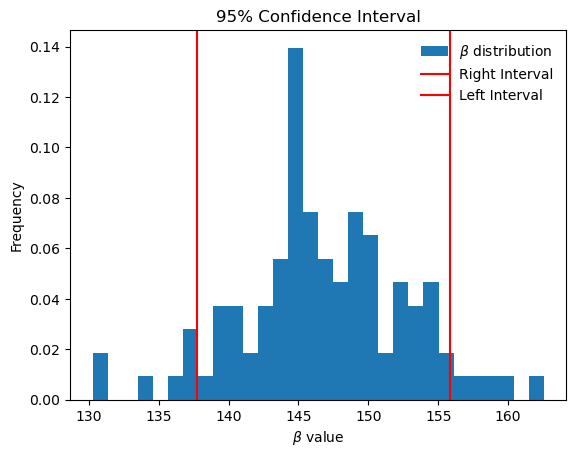

In [19]:
# Call the function plot_simulation to get the histogram for beta 0
# with the confidence interval
plot_simulation(beta0_list, beta0_CI)


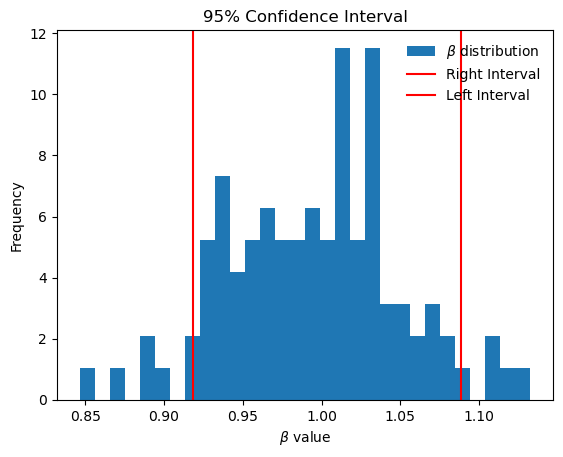

In [20]:
# Call the function plot_simulation to get the histogram for beta 1
# with the confidence interval
plot_simulation(beta1_list, beta1_CI)
